In [3]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, validation_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
import time
warnings.filterwarnings('ignore')

#Loading Dataset

df = pd.read_csv('IBM_HR_Analytics_Employee_attrition.csv')

#1. Exploring the dataset

print(f"Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Description:")
print(df.describe())

Dataset loaded successfully!
Dataset shape: (1470, 35)
Columns: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 14

In [4]:
#Checking for missing values
print(f"\nMissing values:")
print(df.isnull().sum())



Missing values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole     

In [5]:
#Checking for target variable distribution
print(f"\nTarget variable distribution:")
print(df['Attrition'].value_counts())
print(f"Target percentages:")
print(df['Attrition'].value_counts(normalize=True) * 100)



Target variable distribution:
Attrition
No     1233
Yes     237
Name: count, dtype: int64
Target percentages:
Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


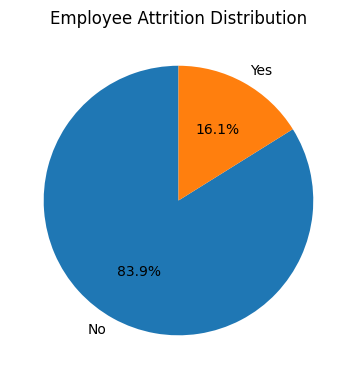

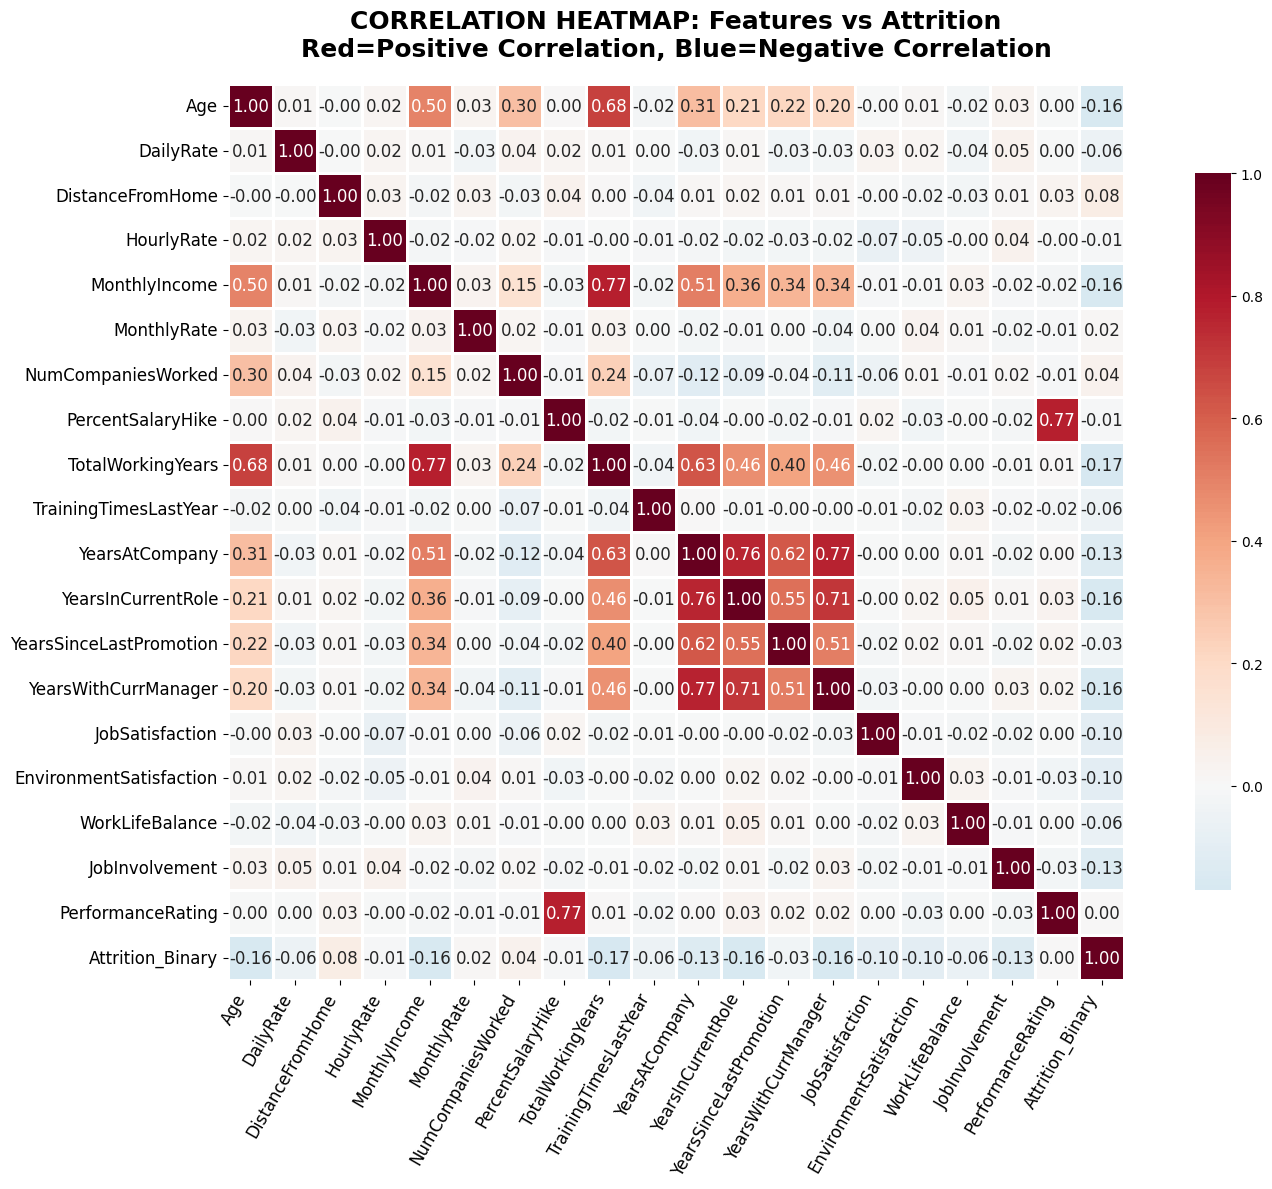

Correlation heatmap displayed!
Look for:
   • Strong correlations with 'Attrition_Binary' (bottom row)
   • Red cells = Higher values increase attrition risk
   • Blue cells = Higher values decrease attrition risk


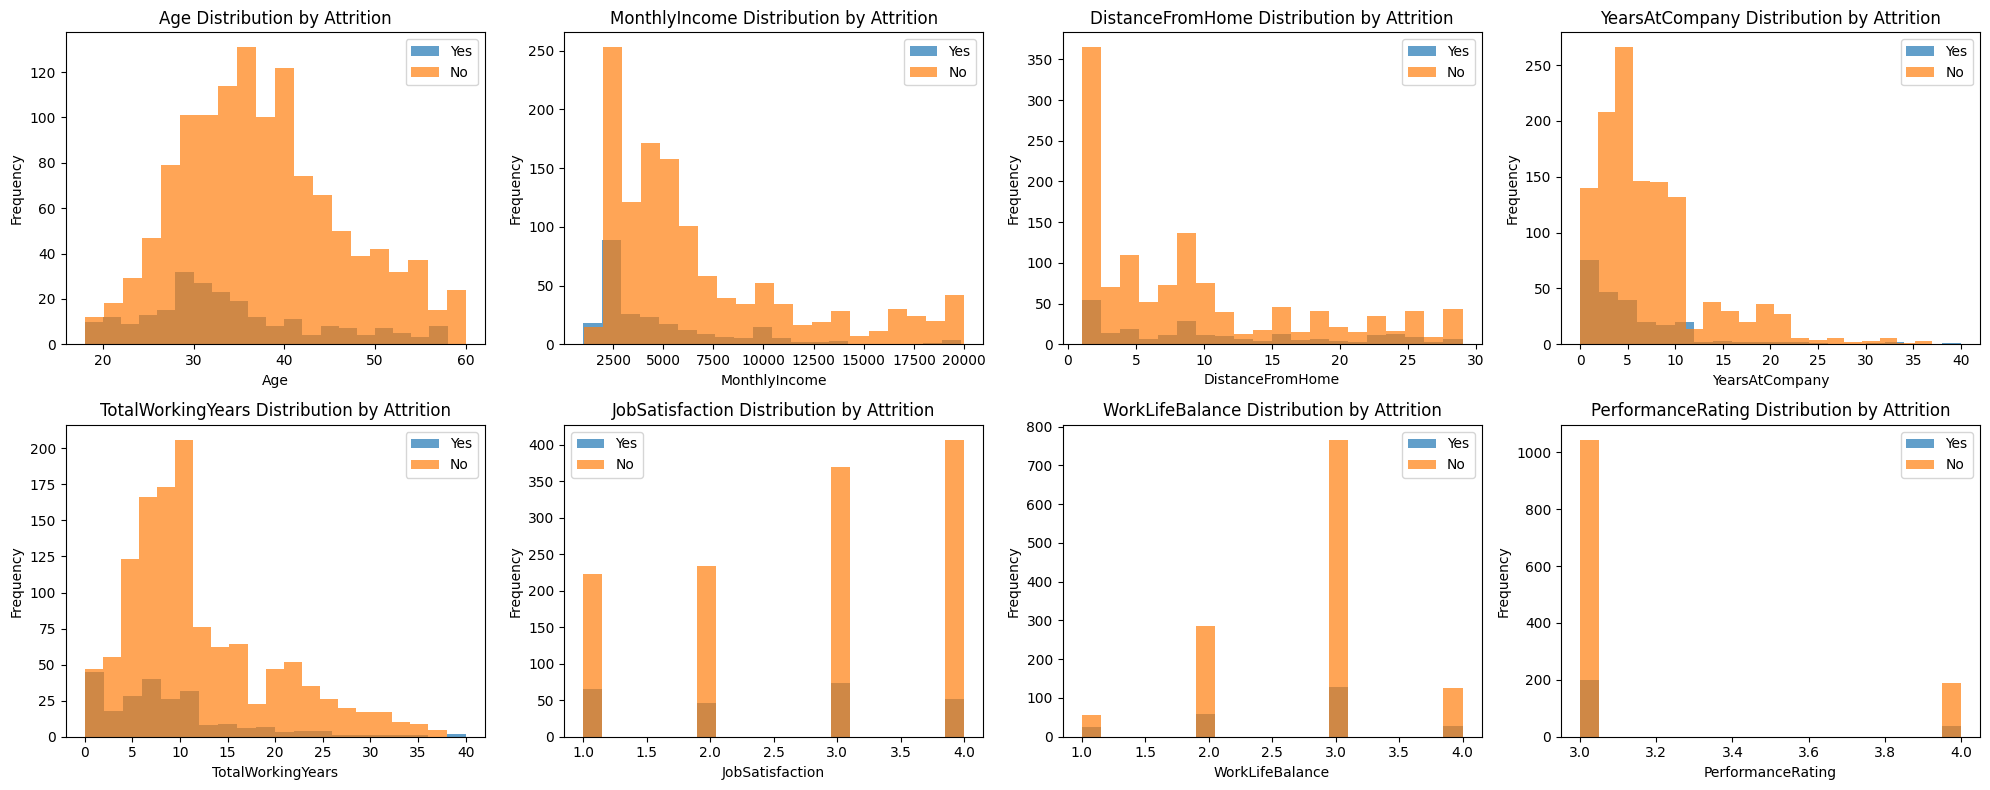

In [ ]:
#Data Visualization
plt.style.use('default')
fig = plt.figure(figsize=(20, 15))

# Visualization 1: Target distribution
plt.subplot(3, 4, 1)
attrition_counts = df['Attrition'].value_counts()
plt.pie(attrition_counts.values, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Employee Attrition Distribution')

# Visualization 2: Correlation heatmap

plt.figure(figsize=(16, 12))
    
# Select key numerical features for correlation
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 
                     'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                     'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
                     'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                     'YearsWithCurrManager', 'JobSatisfaction', 'EnvironmentSatisfaction',
                     'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']
    
# Create correlation data
df_corr = df.copy()
df_corr['Attrition_Binary'] = df_corr['Attrition'].map({'Yes': 1, 'No': 0})
    
# Get available numerical columns
available_cols = [col for col in numerical_cols if col in df_corr.columns]
available_cols.append('Attrition_Binary')
    
# Calculate correlation matrix
correlation_matrix = df_corr[available_cols].corr()
    
# Create the heatmap
sns.heatmap(correlation_matrix, 
                annot=True,
                annot_kws={"size": 12}, 
                cmap='RdBu_r', 
                center=0,
                square=True, 
                fmt='.2f',
                cbar_kws={"shrink": .8},
                linewidths=1)
    
plt.title('CORRELATION HEATMAP: Features vs Attrition\n' + 
              'Red=Positive Correlation, Blue=Negative Correlation', 
              fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=60, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()
    
print("Correlation heatmap displayed!")
print("Look for:")
print("   • Strong correlations with 'Attrition_Binary' (bottom row)")
print("   • Red cells = Higher values increase attrition risk") 
print("   • Blue cells = Higher values decrease attrition risk")


# Visualization 3: Feature Attrition Distribution
from IPython.display import display, Markdown
display(Markdown('## Feature Attrition Distribution'))
key_features = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'YearsAtCompany', 'TotalWorkingYears','JobSatisfaction', 'WorkLifeBalance', 'PerformanceRating']
plt.figure(figsize=(20, 8))
for i, feature in enumerate(key_features):
    plt.subplot(2, 4, i+1)
    for attrition in df['Attrition'].unique():
        data = df[df['Attrition'] == attrition][feature]
        plt.hist(data, alpha=0.7, label=attrition, bins=20)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    # Removed individual subplot titles to prevent merging
    plt.legend()

plt.tight_layout()
plt.show()


In [25]:
#3 Data Preprocessing
print("\nStarting data preprocessing...")

# Prepare features and target variable
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Encode categorical features in X
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
encoders = {}
X_encoded = X.copy()
for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    encoders[col] = le  # Save encoder for each column

# Encode target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"Original classes: {label_encoder.classes_}")
print(f"Encoded classes: {np.unique(y_encoded)}")
print(f"Categorical columns encoded: {categorical_cols}")

import joblib
# Save the encoders dictionary to a file
joblib.dump(encoders, 'encoders.pkl')

# Split the data (70:30 as required)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


  



Starting data preprocessing...
Original classes: ['No' 'Yes']
Encoded classes: [0 1]
Categorical columns encoded: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
Training set size: (1029, 34)
Test set size: (441, 34)


In [8]:
#4. Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_encoded.loc[X_train.index])
X_test_scaled = scaler.transform(X_encoded.loc[X_test.index])

print(f"Original feature means: {X_train.mean().round(3).to_dict()}")
print(f"Scaled feature means: {np.mean(X_train_scaled, axis=0).round(3)}")
print(f"Scaled feature stds: {np.std(X_train_scaled, axis=0).round(3)}")



Original feature means: {'Age': 36.946, 'BusinessTravel': 1.603, 'DailyRate': 809.543, 'Department': 1.265, 'DistanceFromHome': 9.298, 'Education': 2.893, 'EducationField': 2.274, 'EmployeeCount': 1.0, 'EmployeeNumber': 1013.353, 'EnvironmentSatisfaction': 2.707, 'Gender': 0.593, 'HourlyRate': 65.142, 'JobInvolvement': 2.732, 'JobLevel': 2.083, 'JobRole': 4.428, 'JobSatisfaction': 2.707, 'MaritalStatus': 1.093, 'MonthlyIncome': 6548.27, 'MonthlyRate': 14465.365, 'NumCompaniesWorked': 2.72, 'Over18': 0.0, 'OverTime': 0.293, 'PercentSalaryHike': 15.196, 'PerformanceRating': 3.155, 'RelationshipSatisfaction': 2.744, 'StandardHours': 80.0, 'StockOptionLevel': 0.791, 'TotalWorkingYears': 11.324, 'TrainingTimesLastYear': 2.741, 'WorkLifeBalance': 2.76, 'YearsAtCompany': 6.939, 'YearsInCurrentRole': 4.233, 'YearsSinceLastPromotion': 2.19, 'YearsWithCurrManager': 4.13}
Scaled feature means: [ 0.  0.  0. -0.  0.  0.  0.  0. -0.  0. -0.  0.  0. -0. -0.  0. -0. -0.
  0.  0.  0. -0.  0.  0.  0.  0


5. Testing different k values using validation curve
Testing k values: [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29]


  File "c:\Users\tlhun\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 255, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")



Optimal k value: 9
Best validation accuracy: 0.8455


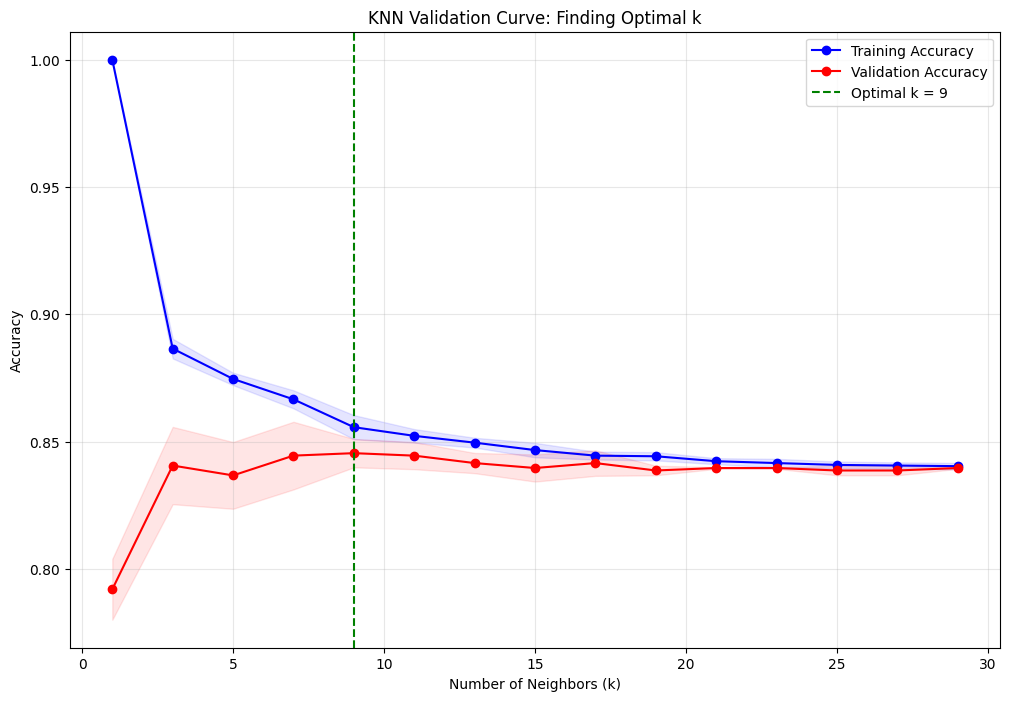


5b. Testing Different Distance Metrics for k=9...
Distance metric 'euclidean': CV Accuracy = 0.8455
Distance metric 'manhattan': CV Accuracy = 0.8542
Distance metric 'minkowski': CV Accuracy = 0.8455
Best distance metric: manhattan


In [9]:
#5. Finding Optimal k for KNN
print(f"\n5. Testing different k values using validation curve")
# Test different k values using validation curve
k_range = np.arange(1, 31, 2)  # Test odd numbers from 1 to 29
print(f"Testing k values: {k_range}")

# Use validation curve to find optimal k
train_scores, val_scores = validation_curve(
    KNeighborsClassifier(), X_train_scaled, y_train,
    param_name='n_neighbors', param_range=k_range,
    cv=5, scoring='accuracy', n_jobs=1
)

# Calculate mean and std for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Find optimal k
optimal_k_idx = np.argmax(val_mean)
optimal_k = k_range[optimal_k_idx]

print(f"\nOptimal k value: {optimal_k}")
print(f"Best validation accuracy: {val_mean[optimal_k_idx]:.4f}")

# Plot validation curve for KNN
plt.figure(figsize=(12, 8))
plt.plot(k_range, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(k_range, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(k_range, val_mean, 'o-', color='red', label='Validation Accuracy')
plt.fill_between(k_range, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
plt.axvline(x=optimal_k, color='green', linestyle='--', label=f'Optimal k = {optimal_k}')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Validation Curve: Finding Optimal k')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Additional analysis: Different distance metrics for optimal k
print(f"\n5b. Testing Different Distance Metrics for k={optimal_k}...")

distance_metrics = ['euclidean', 'manhattan', 'minkowski']
distance_scores = {}

for metric in distance_metrics:
    knn = KNeighborsClassifier(n_neighbors=optimal_k, metric=metric)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    distance_scores[metric] = scores.mean()
    print(f"Distance metric '{metric}': CV Accuracy = {scores.mean():.4f}")

best_metric = max(distance_scores, key=distance_scores.get)
print(f"Best distance metric: {best_metric}")

In [10]:
#6. Model Implementation

models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM (Linear)': SVC(kernel='linear', random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42),
    'SVM (Polynomial)': SVC(kernel='poly', degree=3, random_state=42),
    'SVM (Sigmoid)': SVC(kernel='sigmoid', random_state=42),
    'SVM (RBF-Tuned)': SVC(kernel='rbf', C=10, gamma='scale', random_state=42),
    'K-Nearest Neighbors (Default)': KNeighborsClassifier(n_neighbors=5),
    f'K-Nearest Neighbors (Optimal k={optimal_k})': KNeighborsClassifier(
        n_neighbors=optimal_k, metric=best_metric
    )
}

print(f"Models to be evaluated:")
for name, model in models.items():
    print(f" -  {name}")

Models to be evaluated:
 -  Logistic Regression
 -  Naive Bayes
 -  Decision Tree
 -  Random Forest
 -  SVM (Linear)
 -  SVM (RBF)
 -  SVM (Polynomial)
 -  SVM (Sigmoid)
 -  SVM (RBF-Tuned)
 -  K-Nearest Neighbors (Default)
 -  K-Nearest Neighbors (Optimal k=9)


Evaluating Logistic Regression...
  CV Accuracy: 0.8698 (+/- 0.0316)


Evaluating Naive Bayes...
  CV Accuracy: 0.7765 (+/- 0.0745)


Evaluating Decision Tree...
  CV Accuracy: 0.7901 (+/- 0.0475)


Evaluating Random Forest...
  CV Accuracy: 0.8620 (+/- 0.0204)


Evaluating SVM (Linear)...
  CV Accuracy: 0.8678 (+/- 0.0431)


Evaluating SVM (RBF)...
  CV Accuracy: 0.8552 (+/- 0.0114)


Evaluating SVM (Polynomial)...
  CV Accuracy: 0.8494 (+/- 0.0142)


Evaluating SVM (Sigmoid)...
  CV Accuracy: 0.8572 (+/- 0.0246)


Evaluating SVM (RBF-Tuned)...
  CV Accuracy: 0.8494 (+/- 0.0218)


Evaluating K-Nearest Neighbors (Default)...
  CV Accuracy: 0.8445 (+/- 0.0166)


Evaluating K-Nearest Neighbors (Optimal k=9)...
  CV Accuracy: 0.8513 (+/- 0.0188)




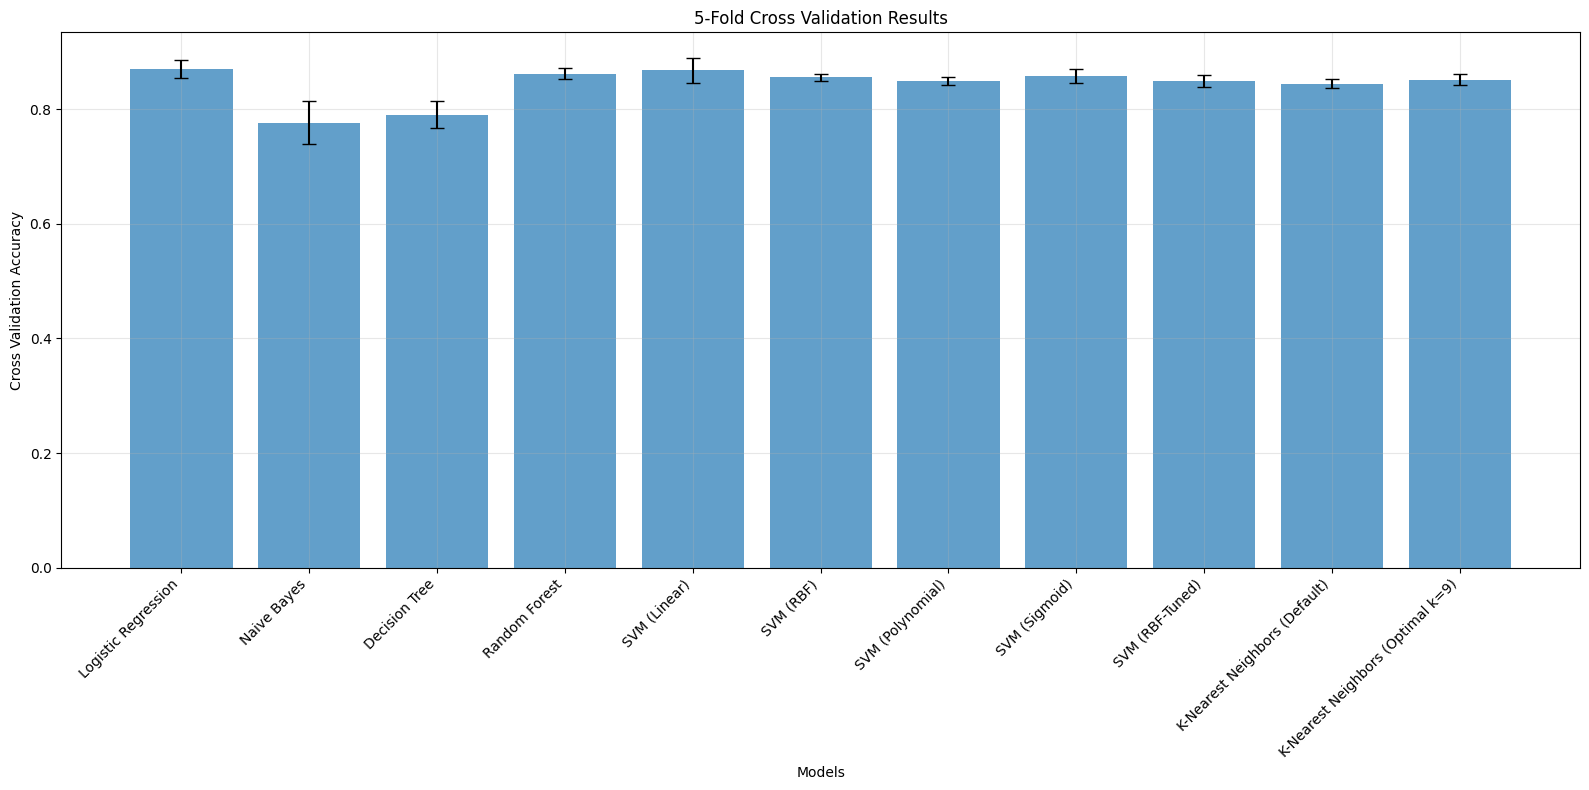

In [11]:
#7. Cross Validation

# Perform cross validation
cv_scores = {}
cv_folds = 5
kfold = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Evaluating {name}...")
    scores = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='accuracy')
    cv_scores[name] = scores
    print(f"  CV Accuracy: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
    print('\n')

# Plot cross validation results
plt.figure(figsize=(16, 8))
model_names = list(cv_scores.keys())
cv_means = [cv_scores[name].mean() for name in model_names]
cv_stds = [cv_scores[name].std() for name in model_names]

plt.bar(range(len(model_names)), cv_means, yerr=cv_stds, capsize=5, alpha=0.7)
plt.xlabel('Models')
plt.ylabel('Cross Validation Accuracy')
plt.title('5-Fold Cross Validation Results')
plt.xticks(range(len(model_names)), model_names, rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [12]:
#8. Model Training and Testing

# dictionaries to store metrics
trained_models = {}
predictions = {}
test_accuracies = {}

for name, model in models.items():
    print(f"Training {name}...")
    # Train the model
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model

    # Make predictions
    y_pred = model.predict(X_test_scaled)
    predictions[name] = y_pred

    # Calculate test accuracy
    test_accuracy = accuracy_score(y_test, y_pred)
    test_accuracies[name] = test_accuracy

    print(f"  Test Accuracy: {test_accuracy:.4f}")
    print()


Training Logistic Regression...
  Test Accuracy: 0.8662

Training Naive Bayes...
  Test Accuracy: 0.7642

Training Decision Tree...
  Test Accuracy: 0.7460

Training Random Forest...
  Test Accuracy: 0.8277

Training SVM (Linear)...
  Test Accuracy: 0.8707

Training SVM (RBF)...
  Test Accuracy: 0.8617

Training SVM (Polynomial)...
  Test Accuracy: 0.8481

Training SVM (Sigmoid)...
  Test Accuracy: 0.8776

Training SVM (RBF-Tuned)...
  Test Accuracy: 0.8617

Training K-Nearest Neighbors (Default)...
  Test Accuracy: 0.8458

Training K-Nearest Neighbors (Optimal k=9)...
  Test Accuracy: 0.8549



In [13]:
#9. Model Evaluation- Generating Classification Reports and Performance Metrics

# Generate classification reports
classification_reports = {}
performance_metrics = {}

for name in models.keys():
    print(f"\n=== {name} ===")

    # Classification report
    report = classification_report(y_test, predictions[name],
                                 target_names=label_encoder.classes_,
                                 output_dict=True)
    classification_reports[name] = report

    # Print the report
    print(classification_report(y_test, predictions[name],
                              target_names=label_encoder.classes_))

    # Extract performance metrics
    performance_metrics[name] = {
        'accuracy': report['accuracy'],
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1_score': report['weighted avg']['f1-score']
    }




=== Logistic Regression ===
              precision    recall  f1-score   support

          No       0.88      0.98      0.92       370
         Yes       0.70      0.30      0.42        71

    accuracy                           0.87       441
   macro avg       0.79      0.64      0.67       441
weighted avg       0.85      0.87      0.84       441


=== Naive Bayes ===
              precision    recall  f1-score   support

          No       0.92      0.79      0.85       370
         Yes       0.37      0.65      0.47        71

    accuracy                           0.76       441
   macro avg       0.64      0.72      0.66       441
weighted avg       0.83      0.76      0.79       441


=== Decision Tree ===
              precision    recall  f1-score   support

          No       0.85      0.84      0.85       370
         Yes       0.23      0.24      0.23        71

    accuracy                           0.75       441
   macro avg       0.54      0.54      0.54       441
w

In [14]:
metrics_df = pd.DataFrame(performance_metrics).T
print("\nPerformance Metrics Summary:")
print(metrics_df.round(4))


Performance Metrics Summary:
                                   accuracy  precision  recall  f1_score
Logistic Regression                  0.8662     0.8496  0.8662    0.8426
Naive Bayes                          0.7642     0.8319  0.7642    0.7874
Decision Tree                        0.7460     0.7517  0.7460    0.7488
Random Forest                        0.8277     0.7711  0.8277    0.7835
SVM (Linear)                         0.8707     0.8563  0.8707    0.8495
SVM (RBF)                            0.8617     0.8512  0.8617    0.8251
SVM (Polynomial)                     0.8481     0.8271  0.8481    0.7967
SVM (Sigmoid)                        0.8776     0.8709  0.8776    0.8535
SVM (RBF-Tuned)                      0.8617     0.8428  0.8617    0.8437
K-Nearest Neighbors (Default)        0.8458     0.8201  0.8458    0.7920
K-Nearest Neighbors (Optimal k=9)    0.8549     0.8598  0.8549    0.8042


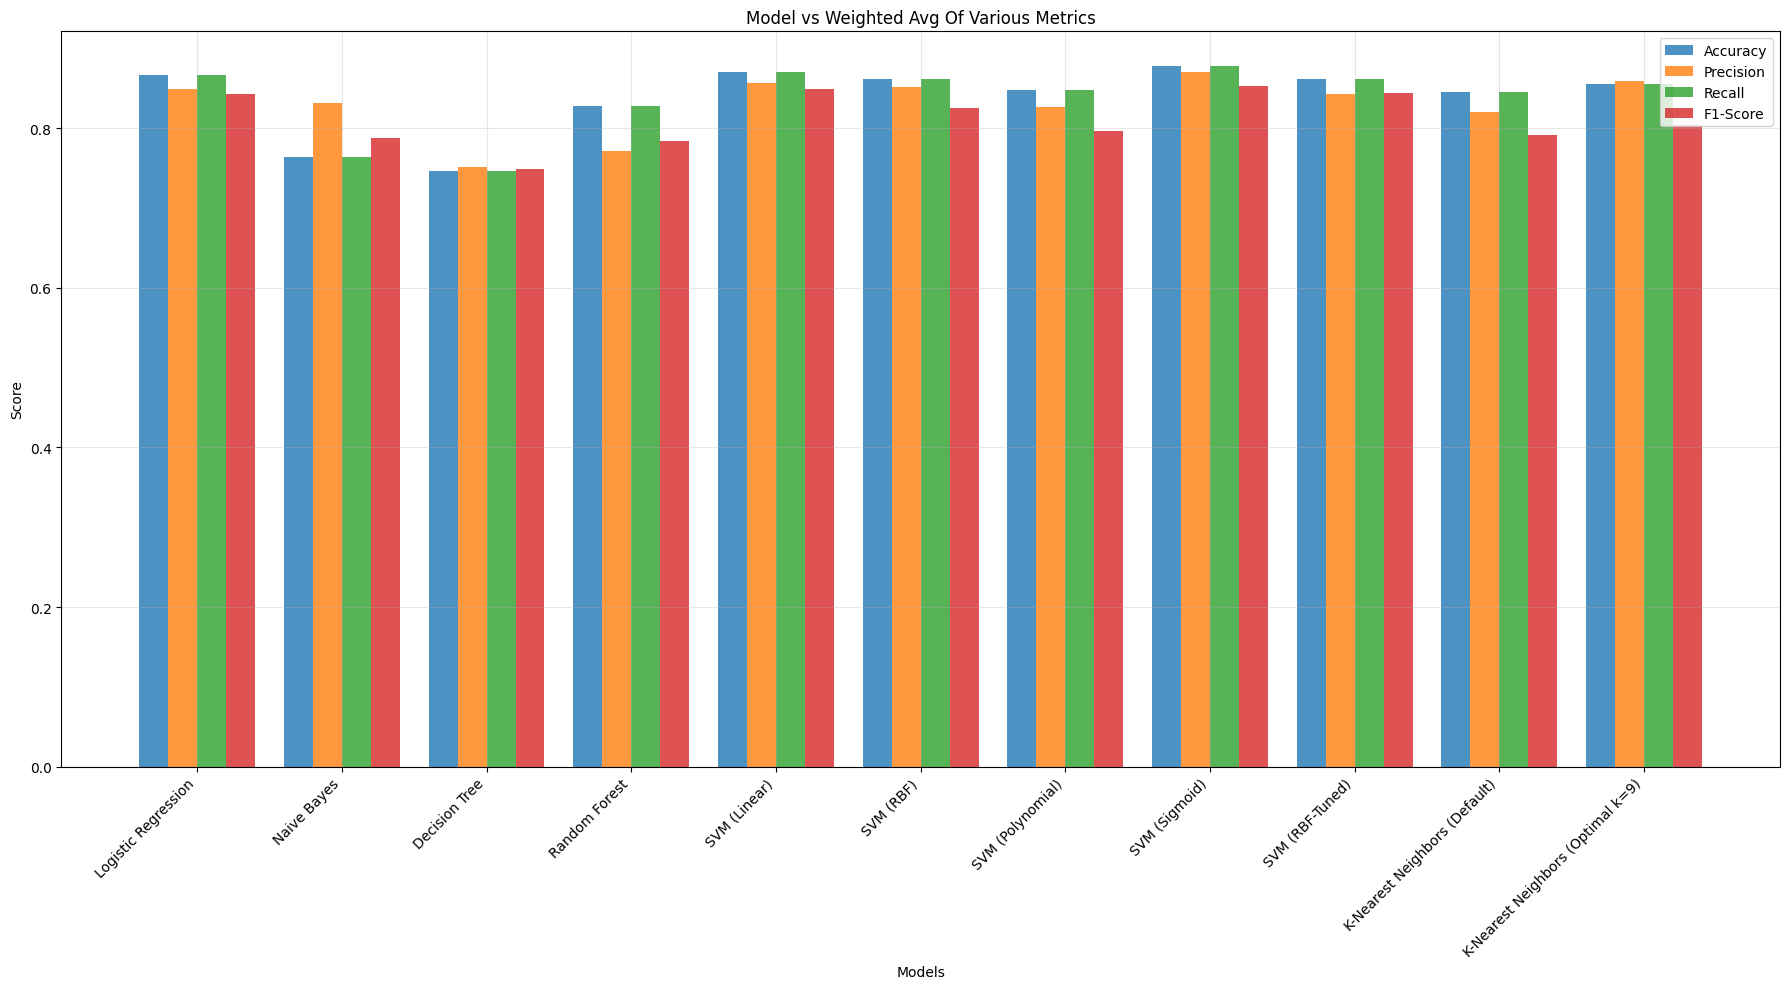

In [15]:
# Plot performance metrics
plt.figure(figsize=(18, 10))

# Create the comparison plot as requested
x = np.arange(len(models))
width = 0.2

plt.bar(x - 1.5*width, metrics_df['accuracy'], width, label='Accuracy', alpha=0.8)
plt.bar(x - 0.5*width, metrics_df['precision'], width, label='Precision', alpha=0.8)
plt.bar(x + 0.5*width, metrics_df['recall'], width, label='Recall', alpha=0.8)
plt.bar(x + 1.5*width, metrics_df['f1_score'], width, label='F1-Score', alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model vs Weighted Avg Of Various Metrics')
plt.xticks(x, metrics_df.index, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Finding optimal K using Elbow Method...


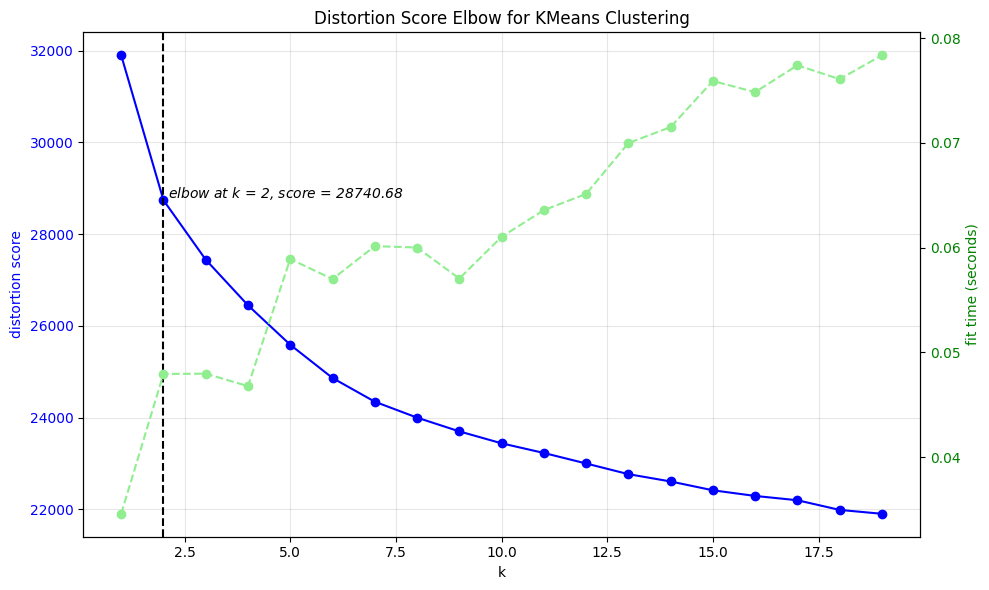

In [16]:
#10. K-Means Clustering

print("Finding optimal K using Elbow Method...")

# checking from 1 to 20
k_range = range(1, 20)
inertias = []
fit_times = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

    start_time = time.time()
    kmeans.fit(X_train_scaled)
    end_time = time.time()

    inertias.append(kmeans.inertia_)
    fit_times.append(end_time - start_time)

# Find the elbow point
elbow_k = 2  
elbow_score = inertias[elbow_k - 1]

# Create plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Primary axis: distortion score
ax1.plot(k_range, inertias, 'o-', color='blue', label='distortion score')
ax1.set_xlabel('k')
ax1.set_ylabel('distortion score', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title("Distortion Score Elbow for KMeans Clustering")
ax1.grid(True, alpha=0.3)

# Annotate elbow
ax1.axvline(x=elbow_k, linestyle='--', color='black')
ax1.text(elbow_k + 0.1, elbow_score + 50, f'elbow at $k$ = {elbow_k}, score = {elbow_score:.2f}',
         fontsize=10, style='italic', color='black')

# Secondary axis: fit time
ax2 = ax1.twinx()
ax2.plot(k_range, fit_times, 'o--', color='lightgreen', label='fit time')
ax2.set_ylabel('fit time (seconds)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.tight_layout()
plt.show()

In [17]:
# Apply K-means with optimal K (let's use k=3 based on the classes we have)
optimal_k_means = len(np.unique(y_encoded))
print(f"\nApplying K-Means with k={optimal_k_means}...")

kmeans = KMeans(n_clusters=optimal_k_means, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_train_scaled)

# Add K-means as a "model" for comparison
kmeans_predictions = kmeans.predict(X_test_scaled)
kmeans_accuracy = accuracy_score(y_test, kmeans_predictions)

print(f"K-Means clustering accuracy: {kmeans_accuracy:.4f}")


Applying K-Means with k=2...
K-Means clustering accuracy: 0.4150


In [18]:
#11. Finding the best model

best_model_name = max(test_accuracies, key=test_accuracies.get)
best_accuracy = test_accuracies[best_model_name]

print(f"Best performing model: {best_model_name}")
print(f"Best test accuracy: {best_accuracy:.4f}")

# Display top 5 models
sorted_models = sorted(test_accuracies.items(), key=lambda x: x[1], reverse=True)
print("\nTop 5 performing models:")
for i, (name, accuracy) in enumerate(sorted_models[:5], 1):
    print(f"{i}. {name}: {accuracy:.4f}")


Best performing model: SVM (Sigmoid)
Best test accuracy: 0.8776

Top 5 performing models:
1. SVM (Sigmoid): 0.8776
2. SVM (Linear): 0.8707
3. Logistic Regression: 0.8662
4. SVM (RBF): 0.8617
5. SVM (RBF-Tuned): 0.8617


Confusion Matrix for Best Model (SVM (Sigmoid))...


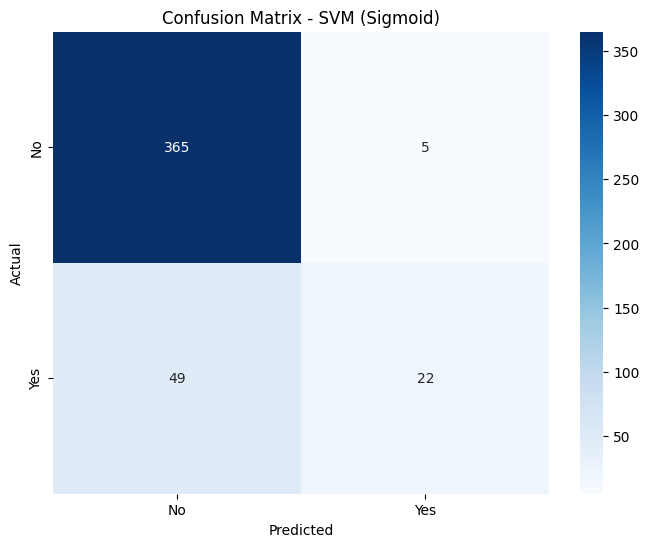

In [19]:
#12. Confustion Matrix for Best Model

print(f"Confusion Matrix for Best Model ({best_model_name})...")

# Create confusion matrix
cm = confusion_matrix(y_test, predictions[best_model_name])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Feature Importance Analysis...
Random Forest Feature Importance:
                     feature  importance
17             MonthlyIncome    0.081132
0                        Age    0.064479
27         TotalWorkingYears    0.063638
2                  DailyRate    0.053092
11                HourlyRate    0.048626
8             EmployeeNumber    0.048433
4           DistanceFromHome    0.043263
18               MonthlyRate    0.041881
30            YearsAtCompany    0.041685
33      YearsWithCurrManager    0.039626
21                  OverTime    0.037488
19        NumCompaniesWorked    0.036669
22         PercentSalaryHike    0.033238
26          StockOptionLevel    0.031972
14                   JobRole    0.031192
9    EnvironmentSatisfaction    0.027218
29           WorkLifeBalance    0.027046
31        YearsInCurrentRole    0.026262
12            JobInvolvement    0.024197
24  RelationshipSatisfaction    0.023529
32   YearsSinceLastPromotion    0.022593
6             EducationField    0

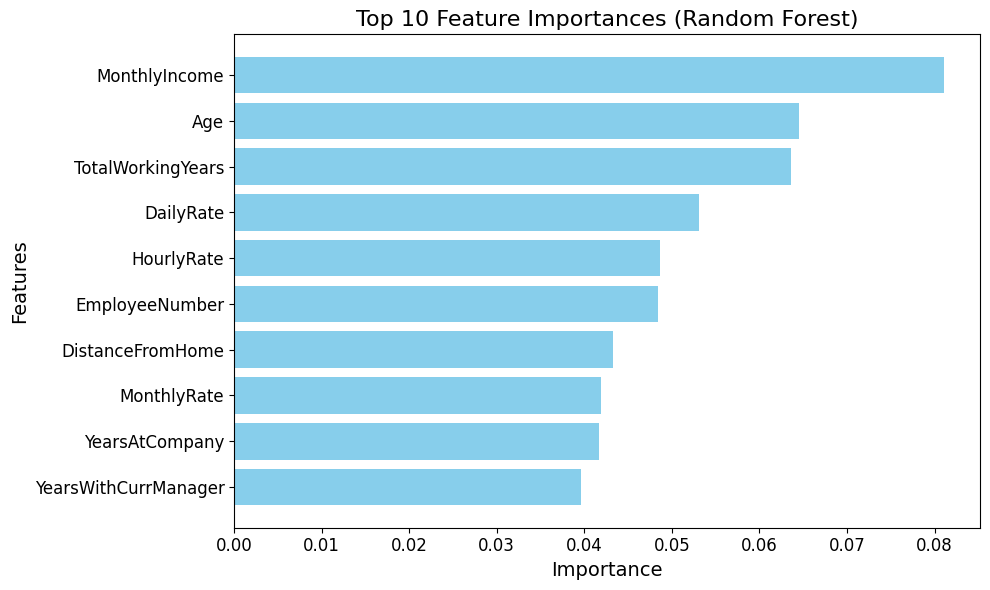

In [20]:
# Feature Importance

print("Feature Importance Analysis...")

# Get feature importance for Random Forest
if 'Random Forest' in trained_models:
    rf_model = trained_models['Random Forest']
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)

    print("Random Forest Feature Importance:")
    print(feature_importance)
    
    top_n = 10
    top_features = feature_importance.head(top_n)
    plt.figure(figsize=(10, 6))
    plt.barh(top_features['feature'], top_features['importance'], color='skyblue')
    plt.gca().invert_yaxis()
    plt.title(f'Top {top_n} Feature Importances (Random Forest)', fontsize=16)
    plt.xlabel('Importance', fontsize=14)
    plt.ylabel('Features', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()




COMPREHENSIVE ANALYSIS SUMMARY

Dataset: IBM_HR_Analytics_Employee_attrition_classification
Total samples: 1470
Features: 34
Classes: 2 (No, Yes)

KNN Optimization Results:
├── Default k=5 accuracy: 0.8458
├── Optimal k=9 accuracy: 0.8549

Best Overall Model: SVM (Sigmoid)
Best Accuracy: 0.8776

Cross Validation Results (Top 5):
1. Logistic Regression: 0.8698
2. SVM (Linear): 0.8678
3. Random Forest: 0.8620
4. SVM (Sigmoid): 0.8572
5. SVM (RBF): 0.8552

Test Accuracy Results (Top 5):
1. SVM (Sigmoid): 0.8776
2. SVM (Linear): 0.8707
3. Logistic Regression: 0.8662
4. SVM (RBF): 0.8617
5. SVM (RBF-Tuned): 0.8617

K-Means Clustering Accuracy: 0.4150

Key Insights:
├── Most important features: ['MonthlyIncome', 'Age', 'TotalWorkingYears']
└── Supervised learning outperformed unsupervised (K-Means) by 0.4626



In [24]:
#15. Save results for deployment preparation

print("="*60)

# Save results for deployment preparation
print(f"\nSaving best model ({best_model_name}) for deployment...")
import joblib

# Save the best model, best accuracy and scaler
joblib.dump(trained_models[best_model_name], 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')
joblib.dump(best_accuracy, 'best_accuracy.pkl')

print("Model artifacts saved successfully!")
print("Files saved: best_model.pkl, scaler.pkl, label_encoder.pkl, best_accuracy.pkl")



Saving best model (SVM (Sigmoid)) for deployment...
Model artifacts saved successfully!
Files saved: best_model.pkl, scaler.pkl, label_encoder.pkl, best_accuracy.pkl
